### Q10
The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster? 

In [1]:
# load and inspect dataset
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
print(olivetti.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (w

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

# create StratifiedShuffleSplit obj
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
# split into 2 parts train_valid and test
# since strat_split.split returns a generator, we need next to iterate its indices
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [11]:
# sanity check
print(f"X_train.shape - {X_train.shape}\ty_train.shape - {y_train.shape}")
print(f"X_valid.shape - {X_valid.shape}\ty_valid.shape - {y_valid.shape}")
print(f"X_test.shape - {X_test.shape}\ty_test.shape - {y_test.shape}")

X_train.shape - (280, 4096)	y_train.shape - (280,)
X_valid.shape - (80, 4096)	y_valid.shape - (80,)
X_test.shape - (40, 4096)	y_test.shape - (40,)


In [12]:
# reduce data dimensionality
from sklearn.decomposition import PCA

pca = PCA(0.99)  # capture atleast .99 variance
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

In [25]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
inertias = []
silhouette_scores = []
k_range = range(5, 150, 1)
k_means_models = []
for clusters in k_range:
    kmeans = KMeans(n_clusters=clusters)
    y_pred = kmeans.fit_predict(X_train_pca)
    k_means_models.append(kmeans)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_pca, kmeans.labels_))

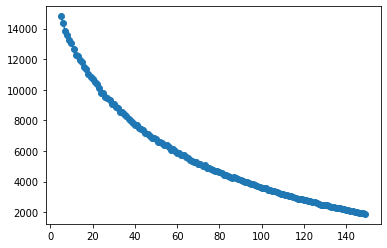

In [26]:
import matplotlib.pyplot as plt

plt.plot(k_range, inertias)
plt.scatter(k_range, inertias)

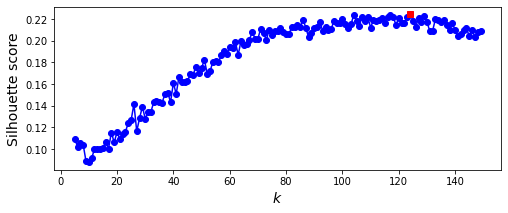

In [27]:
import numpy as np

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [28]:
best_model = k_means_models[best_index]
best_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=124, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Cluster 0


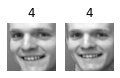

Cluster 1


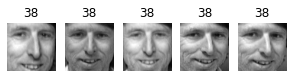

Cluster 2


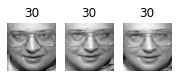

Cluster 3


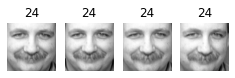

Cluster 4


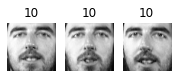

Cluster 5


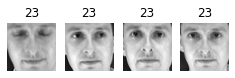

Cluster 6


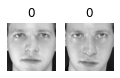

Cluster 7


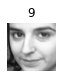

Cluster 8


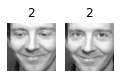

Cluster 9


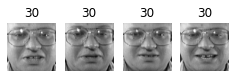

Cluster 10


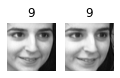

Cluster 11


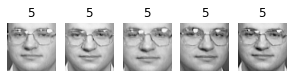

Cluster 12


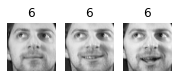

Cluster 13


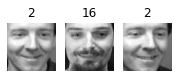

Cluster 14


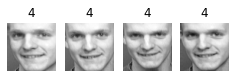

Cluster 15


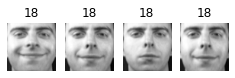

Cluster 16


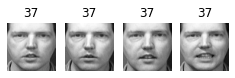

Cluster 17


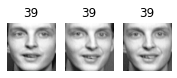

Cluster 18


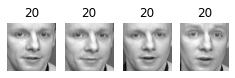

Cluster 19


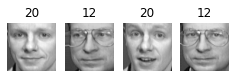

Cluster 20


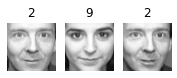

Cluster 21


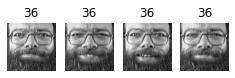

Cluster 22


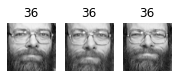

Cluster 23


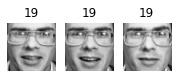

Cluster 24


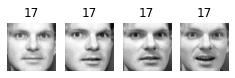

Cluster 25


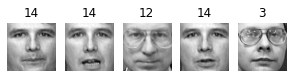

Cluster 26


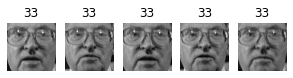

Cluster 27


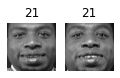

Cluster 28


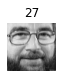

Cluster 29


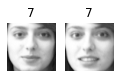

Cluster 30


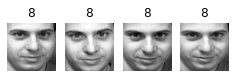

Cluster 31


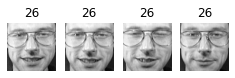

Cluster 32


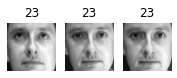

Cluster 33


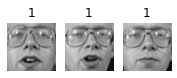

Cluster 34


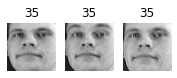

Cluster 35


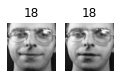

Cluster 36


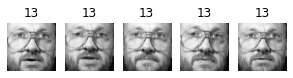

Cluster 37


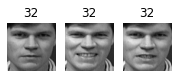

Cluster 38


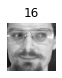

Cluster 39


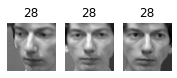

Cluster 40


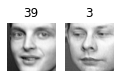

Cluster 41


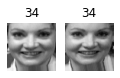

Cluster 42


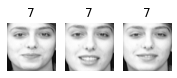

Cluster 43


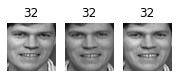

Cluster 44


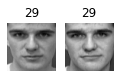

Cluster 45


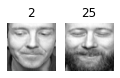

Cluster 46


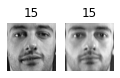

Cluster 47


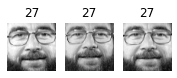

Cluster 48


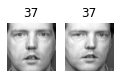

Cluster 49


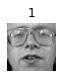

Cluster 50


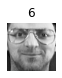

Cluster 51


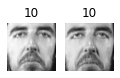

Cluster 52


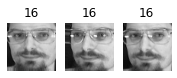

Cluster 53


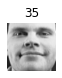

Cluster 54


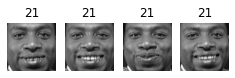

Cluster 55


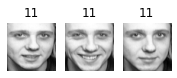

Cluster 56


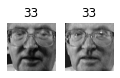

Cluster 57


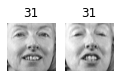

Cluster 58


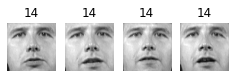

Cluster 59


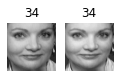

Cluster 60


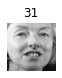

Cluster 61


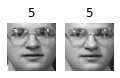

Cluster 62


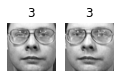

Cluster 63


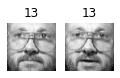

Cluster 64


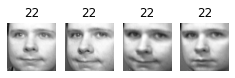

Cluster 65


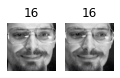

Cluster 66


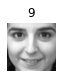

Cluster 67


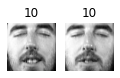

Cluster 68


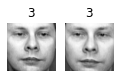

Cluster 69


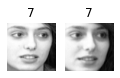

Cluster 70


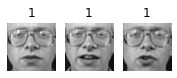

Cluster 71


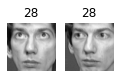

Cluster 72


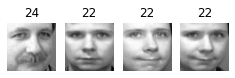

Cluster 73


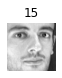

Cluster 74


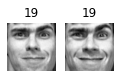

Cluster 75


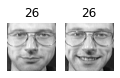

Cluster 76


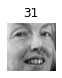

Cluster 77


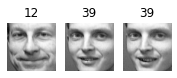

Cluster 78


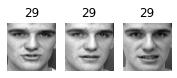

Cluster 79


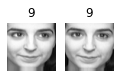

Cluster 80


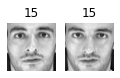

Cluster 81


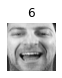

Cluster 82


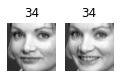

Cluster 83


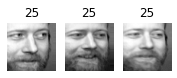

Cluster 84


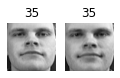

Cluster 85


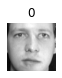

Cluster 86


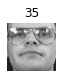

Cluster 87


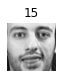

Cluster 88


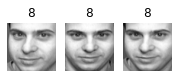

Cluster 89


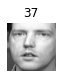

Cluster 90


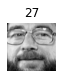

Cluster 91


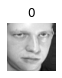

Cluster 92


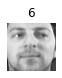

Cluster 93


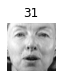

Cluster 94


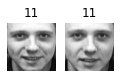

Cluster 95


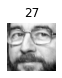

Cluster 96


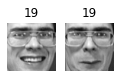

Cluster 97


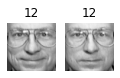

Cluster 98


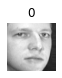

Cluster 99


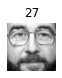

Cluster 100


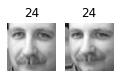

Cluster 101


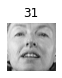

Cluster 102


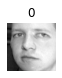

Cluster 103


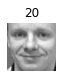

Cluster 104


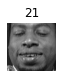

Cluster 105


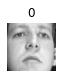

Cluster 106


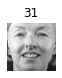

Cluster 107


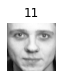

Cluster 108


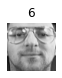

Cluster 109


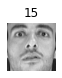

Cluster 110


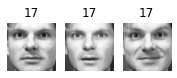

Cluster 111


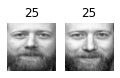

Cluster 112


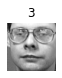

Cluster 113


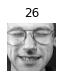

Cluster 114


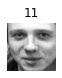

Cluster 115


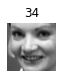

Cluster 116


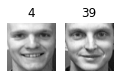

Cluster 117


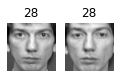

Cluster 118


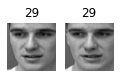

Cluster 119


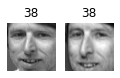

Cluster 120


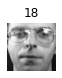

Cluster 121


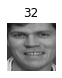

Cluster 122


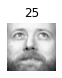

Cluster 123


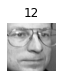

In [29]:
# visualize clusters
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

### Q11
Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)? 

In [30]:
# train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.925

In [31]:
# use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set.
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

0.75

In [32]:
# Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach?
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=n_clusters)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3375
6 0.4125
7 0.4375
8 0.4
9 0.5
10 0.5375
11 0.5625
12 0.525
13 0.5625
14 0.625
15 0.5875
16 0.5625
17 0.575
18 0.5625
19 0.575
20 0.6625
21 0.5875
22 0.6625
23 0.6375
24 0.6
25 0.65
26 0.65
27 0.675
28 0.6625
29 0.6875
30 0.7375
31 0.6875
32 0.7
33 0.675
34 0.675
35 0.725
36 0.675
37 0.6625
38 0.6875
39 0.6875
40 0.75
41 0.7375
42 0.7
43 0.7625
44 0.7125
45 0.6875
46 0.675
47 0.725
48 0.75
49 0.7
50 0.7
51 0.675
52 0.7125
53 0.7125
54 0.75
55 0.725
56 0.7375
57 0.775
58 0.7375
59 0.725
60 0.775
61 0.7
62 0.75
63 0.7625
64 0.775
65 0.7625
66 0.75
67 0.7125
68 0.775
69 0.7375
70 0.7
71 0.7875
72 0.75
73 0.7375
74 0.75
75 0.7625
76 0.7625
77 0.725
78 0.75
79 0.75
80 0.725
81 0.7375
82 0.725
83 0.7375
84 0.725
85 0.7125
86 0.7375
87 0.7
88 0.775
89 0.75
90 0.7125
91 0.75
92 0.7125
93 0.7375
94 0.7375
95 0.775
96 0.7625
97 0.7125
98 0.75
99 0.7
100 0.75
101 0.8
102 0.775
103 0.775
104 0.7625
105 0.7375
106 0.725
107 0.7375
108 0.725
109 0.725
110 0.75
111 0.7625
112 0.8
113 0.7625
1

In [35]:
# What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

print(f"X_train_pca.shape - {X_train_pca.shape}")
print(f"X_train_reduced.shape - {X_train_reduced.shape}")
print(f"X_train_extended.shape - {X_train_extended.shape}")

X_train_pca.shape - (280, 199)
X_train_reduced.shape - (280, 124)
X_train_extended.shape - (280, 323)


In [34]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.8875

### Q12
Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).

In [36]:
# Train a Gaussian mixture model on the Olivetti faces dataset. 
# To speed up the algorithm, you should probably reduce the dataset's dimensionality 
# (e.g., use PCA, preserving 99% of the variance).
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [37]:
# Use the model to generate some new faces (using the sample() method), 
# and visualize them (if you used PCA, you will need to use its inverse_transform() method).
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

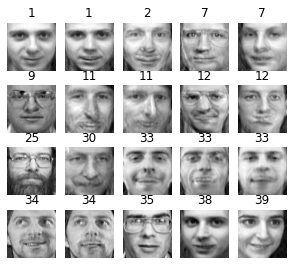

In [38]:
# plot faces
plot_faces(gen_faces, y_gen_faces)

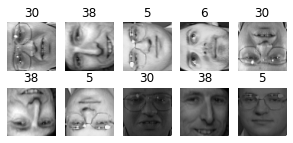

In [40]:
# Try to modify some images (e.g., rotate, flip, darken) and 
# see if the model can detect the anomalies (i.e., compare the output of 
# the score_samples() method for normal images and for anomalies).
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64*64)
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [41]:
X_bad_faces_pca = pca.transform(X_bad_faces)
print(f"Bad Faces Score - {gm.score_samples(X_bad_faces_pca)}")
print(f"Original Faces Score - {gm.score_samples(X_train_pca[:10])}")

Bad Faces Score - [-1.79997510e+07 -2.26427357e+07 -3.96415561e+07 -4.60254395e+07
 -3.13975266e+07 -1.39330495e+07 -2.90882770e+07 -1.06298615e+08
 -1.20930974e+08 -7.49739785e+07]
Original Faces Score - [1163.0202093  1149.16682369 1148.47710431 1170.6760289  1088.46009564
 1075.71700315 1075.7170075  1088.4600894  1096.42609709 1119.68627026]


### Q13
Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.


In [42]:
X_train_pca

array([[ 3.78081870e+00, -1.85478783e+00, -5.14404106e+00, ...,
        -1.35633215e-01, -2.14082390e-01,  6.11918792e-02],
       [ 1.01488552e+01, -1.52754641e+00, -7.66972005e-01, ...,
         1.23938702e-01, -1.35264218e-01, -2.32756715e-02],
       [-1.00152893e+01,  2.87729931e+00, -9.19886231e-01, ...,
         7.26091713e-02, -2.96061928e-03,  1.24891475e-01],
       ...,
       [ 2.47586775e+00,  2.95597267e+00,  1.29985702e+00, ...,
        -2.09132396e-02,  3.48520577e-02, -1.54326335e-01],
       [-3.22031188e+00,  5.34898090e+00,  1.39427006e+00, ...,
         5.75526841e-02, -2.28311747e-01,  1.55578002e-01],
       [-9.22877133e-01, -3.64703012e+00,  2.26088071e+00, ...,
         1.36853680e-01, -6.91293478e-02,  6.26830086e-02]], dtype=float32)

In [43]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [44]:
print(f"Reconstruction Error on original faces - {reconstruction_errors(pca, X_train).mean()}")
print(f"Reconstruction Error on bad faces - {reconstruction_errors(pca, X_bad_faces).mean()}")

Reconstruction Error on original faces - 0.00019205351418349892
Reconstruction Error on bad faces - 0.004707354120910168


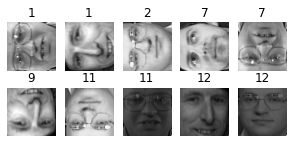

In [45]:
plot_faces(X_bad_faces, y_gen_faces)

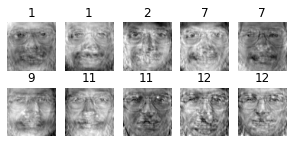

In [46]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_gen_faces)